In [259]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']=10,6

# AR Model
1. Autoregressive (AR) models are defined as regression models in which the dependent or response variable is a linear function of past values of the dependent/response variable. 

2. The order of an autoregressive model is denoted as ‘p’, which represents the number of lags used to predict the current value. 

3. If p=0, then it means that we are predicting the current time-step (t) based on the previous time-step (t-0). 

4. If p=n, then we are predicting time-step (t) based on n past time-steps.

# GENERAL FORM

Yt=c+ϕpYt−p+εt


In [167]:
e_pro = pd.read_csv('Electric_Production.csv',index_col=0,parse_dates=True)

In [168]:
e_pro

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [169]:
e_pro.rename(columns = {'IPG2211A2N':'production'}, inplace = True)

In [170]:
e_pro.describe()

,production
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


<AxesSubplot:xlabel='DATE'>

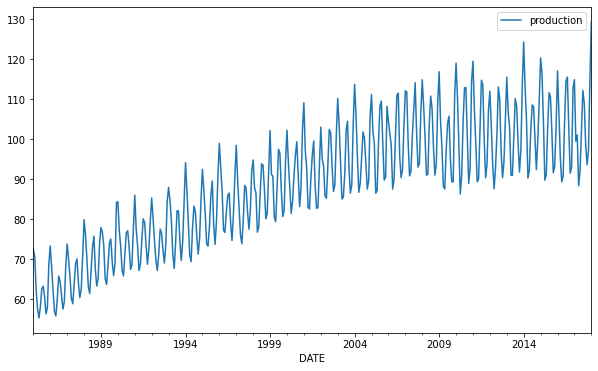

In [171]:
e_pro.plot()

In [172]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(e_pro['production'],autolag ='AIC')

print("ADF : ",dftest[0])
print("P-value : ",dftest[1])
print("Lags : ",dftest[2])
print("Observations : ",dftest[3])
print("Critical Values : ",dftest[4])

ADF :  -2.2569903500472455
P-value :  0.18621469116586759
Lags :  15
Observations :  381
Critical Values :  {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}


In [173]:
e_log = np.log(e_pro)

<AxesSubplot:xlabel='DATE'>

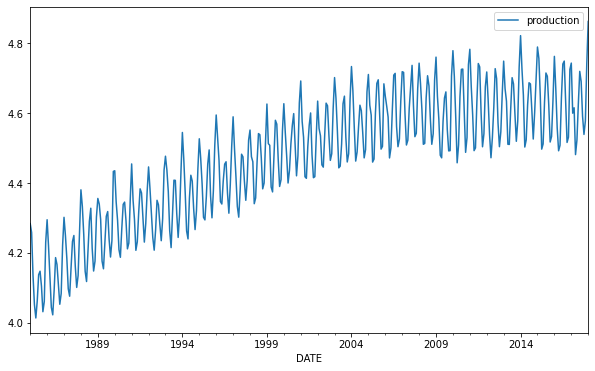

In [174]:
e_log.plot()

In [175]:
e_shifting = e_log['production'] - e_log['production'].shift(1)

In [176]:
e_shifting.dropna(inplace=True)

In [177]:
from statsmodels.tsa.stattools import adfuller
log_test = adfuller(e_shifting,autolag ='AIC')

print("ADF : ",log_test[0])
print("P-value : ",log_test[1])
print("Lags : ",log_test[2])
print("Observations : ",log_test[3])
print("Critical Values : ",log_test[4])

ADF :  -6.748333370019157
P-value :  2.9951614981156204e-09
Lags :  14
Observations :  381
Critical Values :  {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}


C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


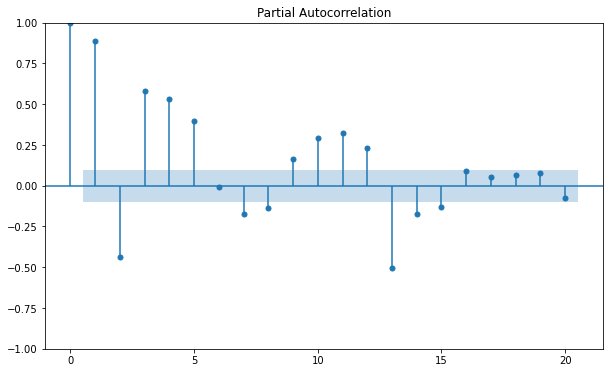

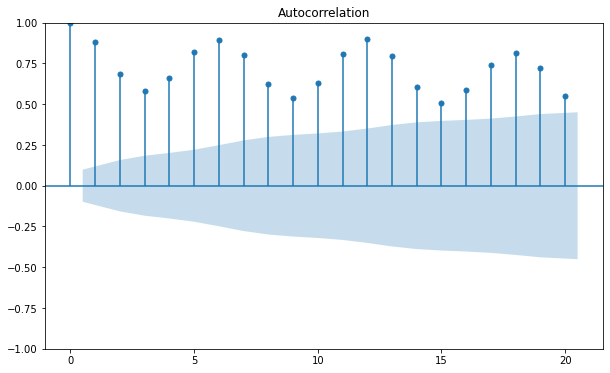

In [207]:
pacf = plot_pacf(e_log['production'],lags = 20)
acf = plot_acf(e_log['production'],lags = 20)

In [179]:
val = e_log['production'].values

In [280]:
train = e_log[:350]
test = e_log[350:]

In [281]:
model = AutoReg(train,lags=4).fit()

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [282]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:             production   No. Observations:                  350
Model:                     AutoReg(4)   Log Likelihood                 582.814
Method:               Conditional MLE   S.D. of innovations              0.045
Date:                Thu, 20 Oct 2022   AIC                          -1153.627
Time:                        19:14:05   BIC                          -1130.548
Sample:                    05-01-1985   HQIC                         -1144.437
                         - 02-01-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1317      0.068      1.930      0.054      -0.002       0.265
production.L1     1.2546      0.045     27.856      0.000       1.166       1.343
production.L2    -0.6026      0.080     

In [283]:
pred = model.predict(start=350, end= 396,dynamic=False)

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


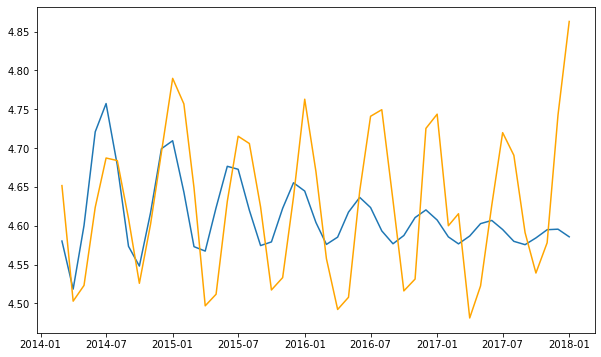

In [284]:
pyplot.plot(pred)
pyplot.plot(test,color='orange')
#print(pred)

In [187]:
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

0.08822123225867336


C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


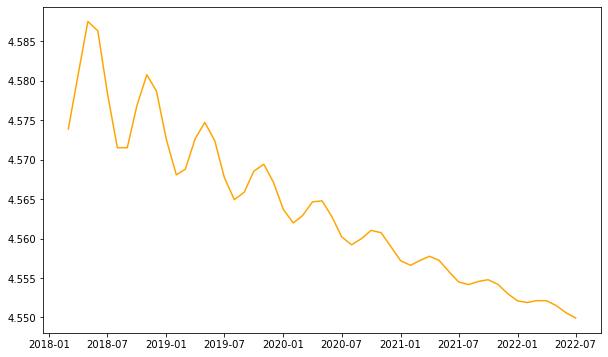

In [188]:
future = model.predict(start=398,end=450 , dynamic=False)
pyplot.plot(future,color='orange')

# SIMPLE MOVING AVERAGE

1. Moving average (MA) is a type of model used for time-series forecasting. 
2. The moving average models are primarily used for stationary data, the data where we don’t see significant trends or seasonality. 

# There are two different kinds of moving average model. 
1. Simple moving average 
2. Weighted moving average model.


A Simple Moving Average (SMA) is a type of moving Average model that uses a fixed number of data points for the averaging calculation. This type of MA is often used for time-series forecasting, because it is easy to calculate and can be implemented in a variety of programming languages

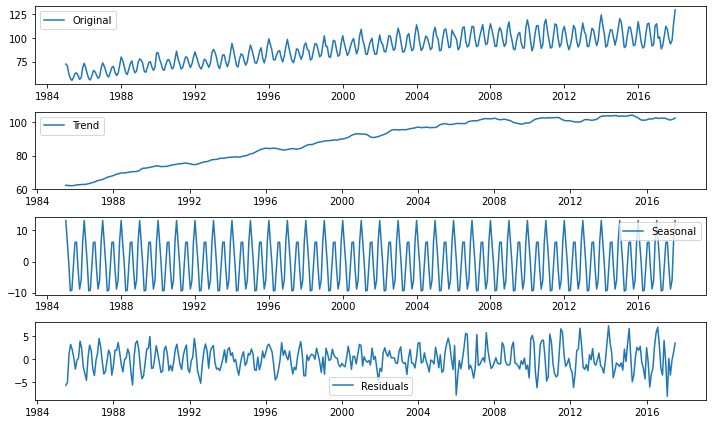

In [196]:
#additive
decomposition = seasonal_decompose(e_pro['production'],model="additive")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(e_pro['production'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

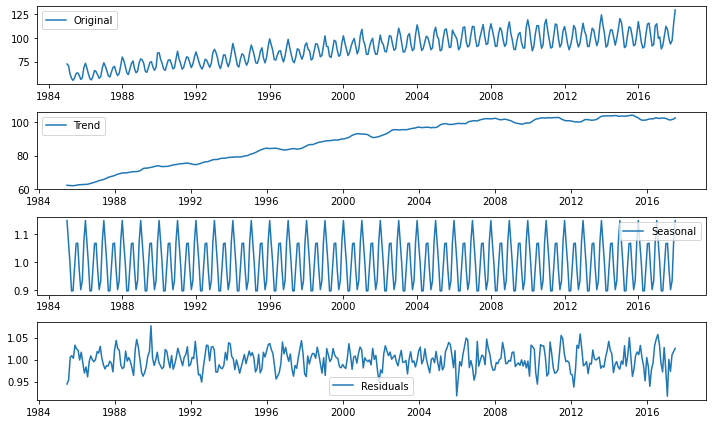

In [195]:
#multiplicative
decomposition = seasonal_decompose(e_pro['production'],model="multiplicative")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(e_pro['production'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [203]:
length = 350
train = e_pro[0:length]
test = e_pro[length:]

In [190]:
sma = e_pro.copy()

In [204]:
sma['forecast_sma'] = e_pro['production'].rolling(30).mean()
sma['forecast_sma'][length:]= sma['forecast_sma'][length-1]

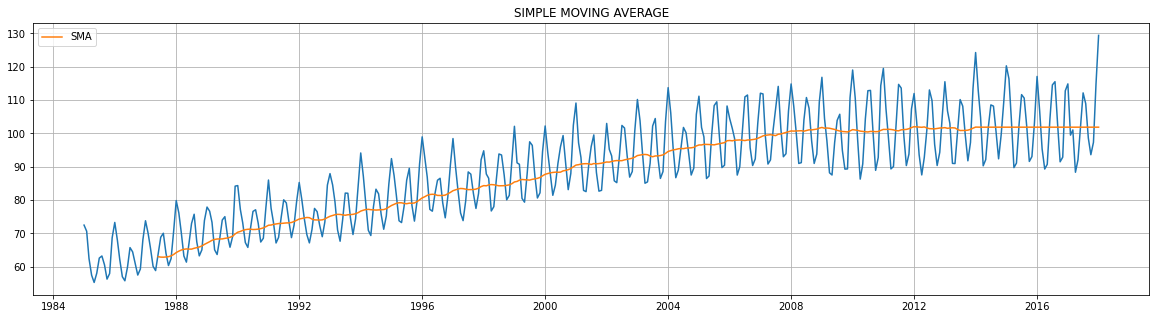

In [206]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(e_pro['production'])
plt.plot(sma['forecast_sma'],label='SMA')
plt.legend(loc='best')
plt.title('SIMPLE MOVING AVERAGE')
plt.show()

In [208]:
pred_start_date = test.index[0]
pred_end_date = test.index[-1]

# ARIMA
1. The autoregressive integrated moving average (ARIMA) model is a generalization of the ARMA model. 

2. The ARIMA model is defined as a regression model in which the dependent/response variable is a linear function of past values of both the dependent/response variable and the error term, where the error term has been differentiated ‘d’ times. 

3. The order of an ARIMA model is represented by ‘p’ for the autoregressive part, ‘q’ for the moving average part, and ‘d’ for the differencing part.

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4131.495, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3673.258, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2292.696, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2293.864, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2218.101, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3265.595, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2187.790, Time=0.38 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2150.097, Time=0.51 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2150.100, Time=0.44 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2271.411, Time=0.84 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2196.253, Time=1.01 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 4.737 seconds
                               S

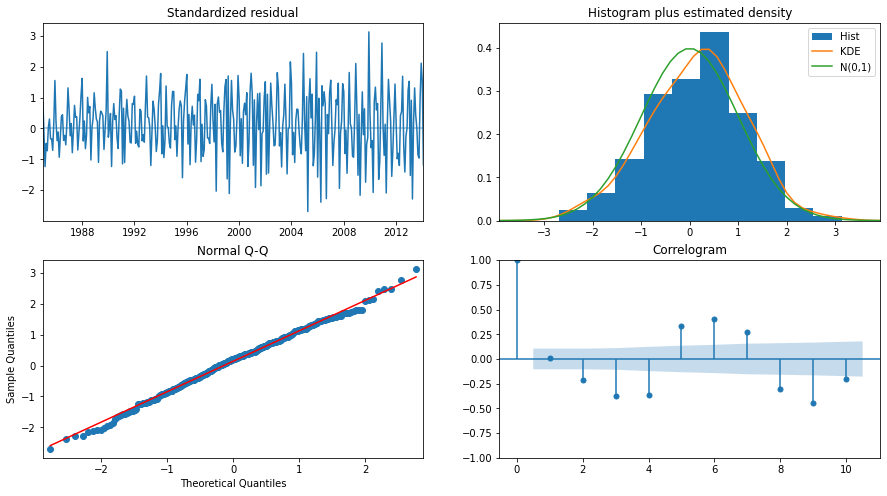

In [253]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,             
                      d=None,          
                      seasonal=False,  
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


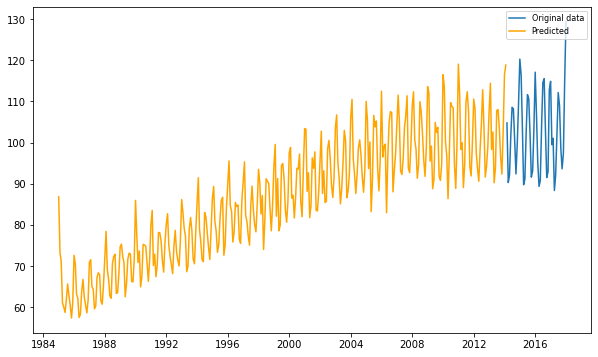

In [252]:
model = sm.tsa.arima.ARIMA(train['production'], order=(2,0,3))  
fitted_low = model.fit()  
forecast = fitted_low.predict(dynamic=False)
#forecast = pd.DataFrame(forecast,index=test_data.index,columns=['Prediction'])
plt.plot(test, label='Original data')
plt.plot(forecast, color = 'orange',label='Predicted')
plt.legend(loc='upper right', fontsize=8)
plt.show()

# SARIMA 
1. SARIMA is a type of time-series forecasting model that takes into account both seasonality and autocorrelation.

2. Are based on a combination of differencing, autoregression, and moving average processes.

3. Models can be used to forecast short-term or long-term trends in data. 

4. Models are generally considered to be more accurate than other types of time-series forecasting models, such as ARIMA models. 

5. Are also relatively easy to interpret and use.

In [272]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order)

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [273]:
model_Fit = model.fit()

In [274]:
print(model_Fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           production   No. Observations:                  350
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -831.876
Date:                              Thu, 20 Oct 2022   AIC                           1669.753
Time:                                      16:57:25   BIC                           1681.318
Sample:                                  01-01-1985   HQIC                          1674.357
                                       - 02-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9957      0.003    296.623      0.000       0.989       1.002
ma.S.L12      -0.73

In [276]:
predictions = model_Fit.forecast(46)
predictions = pd.Series(predictions, index=test.index)
#residuals = test - predictions
#predictions

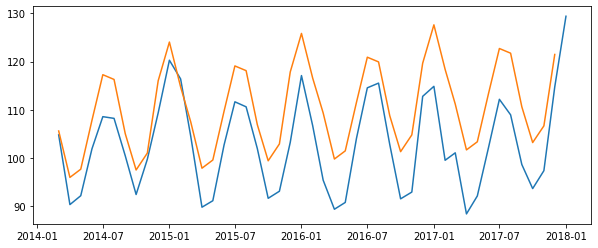

In [278]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)